# Feature importance through regression model

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("dataset\merged_data.csv")

In [2]:
df=data.drop(["Unnamed: 0","year_month","DIST_NUM"],axis=1)
df

,crime_Aggravated Assault Firearm,crime_Aggravated Assault No Firearm,crime_All Other Offenses,crime_Arson,crime_Burglary Non-Residential,crime_Burglary Residential,crime_DRIVING UNDER THE INFLUENCE,crime_Disorderly Conduct,crime_Embezzlement,crime_Forgery and Counterfeiting,...,traffic_stop_subject_race_unknown_count,traffic_stop_subject_race_white_count,traffic_stop_subject_sex_female_count,traffic_stop_subject_sex_male_count,traffic_stop_type_pedestrian_count,traffic_stop_type_vehicular_count,traffic_stop_outcome_arrest_count,traffic_stop_contraband_found_False_count,traffic_stop_contraband_found_True_count,traffic_stop_total
0,0.526589,1.194706,1.457646,0.000000,0.526589,1.223156,1.124748,0.869742,0.000000,0.741276,...,1.609438,5.062595,4.574711,5.659482,4.990433,5.468060,2.564949,2.564949,1.098612,5.948035
1,0.741276,1.223156,1.821607,0.526589,0.741276,1.646667,1.310506,1.310506,0.000000,0.526589,...,0.000000,4.624973,4.248495,5.463832,4.804021,5.214936,2.995732,2.079442,1.791759,5.720312
2,0.741276,1.457646,1.628131,0.000000,0.959135,1.397363,1.385227,1.248441,0.869742,0.000000,...,0.000000,4.682131,3.828641,4.882802,4.110874,4.762174,1.609438,1.609438,0.000000,5.176150
3,0.526589,1.124748,1.327761,0.000000,0.869742,1.248441,0.959135,1.124748,0.000000,0.526589,...,0.693147,3.465736,2.639057,3.555348,2.564949,3.583519,0.000000,0.693147,0.693147,3.871201
4,0.526589,1.248441,1.610903,0.000000,0.869742,1.223156,1.162283,1.429846,0.741276,0.000000,...,0.693147,3.850148,3.637586,4.709530,3.891820,4.605170,2.708050,1.945910,2.197225,4.997212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1.327761,1.555545,1.796820,0.526589,1.124748,1.429846,1.419607,0.959135,1.026672,0.000000,...,2.944439,5.855072,5.347108,6.525030,5.883322,6.278521,4.007333,4.369448,2.833213,6.792344
1098,1.474144,1.595709,1.706721,0.959135,0.959135,1.327761,1.327761,0.000000,0.526589,0.000000,...,3.367296,5.170484,5.476464,6.563856,5.323010,6.612041,3.688879,4.262680,2.833213,6.854355
1099,0.741276,1.358505,1.631370,0.526589,1.080418,1.310506,0.959135,0.000000,0.000000,0.000000,...,1.098612,4.663439,4.304065,5.398163,4.094345,5.459586,3.091042,3.178054,1.945910,5.683580
1100,1.439569,1.539779,1.757132,0.959135,1.080418,1.439569,1.429846,0.000000,0.000000,0.869742,...,2.772589,4.276666,5.638355,6.988413,5.620401,6.993933,4.262680,4.962845,2.995732,7.218910


## Observe the correlation coefficient associated to the index

In [3]:
import pandas as pd
corr=df.corr(method='pearson')
corr["index"].sort_values(ascending=False).head(10)

index                   1.000000
URBAN_RURAL_3           0.705613
WEATHER1_3              0.701794
ROAD_CONDITION_1        0.700708
LOCATION_TYPE_0         0.685677
ILLUMINATION_1.0        0.660704
INTERSECT_TYPE_0        0.638833
DRIVER_COUNT_50_64YR    0.612315
ILLUMINATION_3.0        0.600950
INTERSECT_TYPE_1        0.599343
Name: index, dtype: float64

In [4]:
corr["index"].sort_values(ascending=True).head(10)

WEATHER1_10                     -0.091863
ROAD_CONDITION_7                -0.088809
ROAD_CONDITION_2                -0.083105
WEATHER1_9                      -0.069782
ROAD_CONDITION_6                -0.049713
INTERSECT_TYPE_11               -0.009566
crime_Homicide - Justifiable    -0.005621
ROAD_CONDITION_0                -0.003388
LOCATION_TYPE_5                  0.002079
LOCATION_TYPE_99                 0.003325
Name: index, dtype: float64

In [5]:
df.columns

Index(['crime_Aggravated Assault Firearm',
       'crime_Aggravated Assault No Firearm', 'crime_All Other Offenses',
       'crime_Arson', 'crime_Burglary Non-Residential',
       'crime_Burglary Residential', 'crime_DRIVING UNDER THE INFLUENCE',
       'crime_Disorderly Conduct', 'crime_Embezzlement',
       'crime_Forgery and Counterfeiting',
       ...
       'traffic_stop_subject_race_unknown_count',
       'traffic_stop_subject_race_white_count',
       'traffic_stop_subject_sex_female_count',
       'traffic_stop_subject_sex_male_count',
       'traffic_stop_type_pedestrian_count',
       'traffic_stop_type_vehicular_count',
       'traffic_stop_outcome_arrest_count',
       'traffic_stop_contraband_found_False_count',
       'traffic_stop_contraband_found_True_count', 'traffic_stop_total'],
      dtype='object', length=110)

## Lasso regression

Mean Squared Error: 0.3025335172879944
Lasso coefficients:
URBAN_RURAL_3                                0.233332
ROAD_CONDITION_1                             0.142565
ILLUMINATION_3.0                             0.043649
traffic_stop_contraband_found_False_count    0.017216
DRIVER_COUNT_50_64YR                         0.017167
crime_Burglary Non-Residential               0.014775
INTERSECT_TYPE_0                             0.014066
LOCATION_TYPE_2                              0.007705
crime_Homicide - Criminal                    0.004747
INTERSECT_TYPE_5                             0.003946
dtype: float64
The most important feature: URBAN_RURAL_3


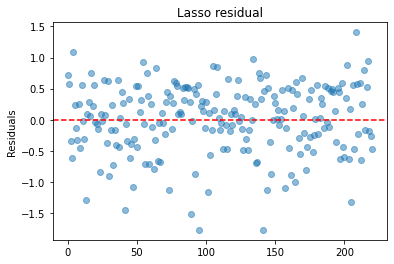

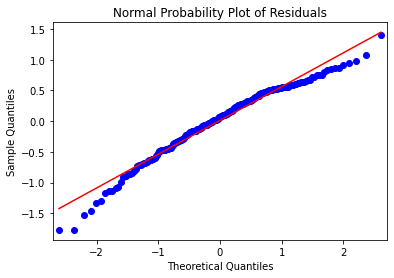

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Split data into features (X) and response variables (y)
X = df.drop('index', axis=1)

y = df['index']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Lasso Regression 
alpha = 0.05# Set the penalty item coefficiente
lasso = Lasso(alpha=alpha)

# fit
lasso.fit(X_train_scaled, y_train)


# pred
y_pred = lasso.predict(X_test_scaled)

# compute mse
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the feature importance
coef = pd.Series(lasso.coef_, index=X.columns)
print('Lasso coefficients:')
print(np.abs(coef).sort_values(ascending=False).head(10))

# Find the features that have the greatest influence on y
max_coef = np.abs(coef).idxmax()
print(f'The most important feature: {max_coef}')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
# draw the residual plot
residuals = y_test - y_pred
plt.scatter(np.arange(len(y_test)),residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('Residuals')
plt.title('Lasso residual')
plt.show()


import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Normal Probability Plot of Residuals')
plt.show()

In [43]:
nonzero_index =coef.to_numpy().nonzero()
len(nonzero_index[0])

11

In [42]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(residuals, 0)

print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: 0.32533867813402395, p-value: 0.7452339568537066


We cannot reject the hypothesis, so the mean of residuals is 0

Evaluate model's efficiency through cross-validation

In [45]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation, where no standardization makes no difference
n_folds = 5
lasso_cv = Lasso(alpha=alpha, max_iter=10000)
scores = cross_val_score(lasso_cv, X, y, cv=n_folds, scoring='neg_mean_squared_error')

# MSE
mean_mse = np.mean(-scores)
print(f'Average Mean Squared Error: {mean_mse}')

Average Mean Squared Error: 0.294064478724548


# try some other models, the results do not improve

In [27]:
#try Ridge regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)  


ridge_model.fit(X_train_scaled, y_train)


y_pred = ridge_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

coef = pd.Series(ridge_model.coef_, index=X.columns)
print('ridge coefficients:')
print(np.abs(coef).sort_values(ascending=False).head(10))

Mean Squared Error: 0.2691988980227233
ridge coefficients:
WEATHER1_3                             0.242295
traffic_stop_subject_sex_male_count    0.218388
traffic_stop_type_vehicular_count      0.216820
URBAN_RURAL_3                          0.197716
ROAD_CONDITION_1                       0.190521
ILLUMINATION_1.0                       0.173520
ILLUMINATION_3.0                       0.145903
crime_total                            0.139788
crime_All Other Offenses               0.093934
traffic_stop_type_pedestrian_count     0.088057
dtype: float64


In [28]:
#try ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01,l1_ratio=0.01)
elastic_net.fit(X_train_scaled, y_train)


y_pred = elastic_net.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.26495369895605625


C:\ProgramData\Anaconda3\envs\aaa\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0215445061712103, tolerance: 0.045479848983796124
  positive)
